# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
!pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559700 sha256=d7def94ef580b02ae80a8f9fc26b5bbc291a3b5090244230a5456f1a637ac9cc
  Stored in directory: c:\users\miss_\appdata\local\pip\cache\wheels\6d\df\5e\ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy


In [26]:
import matplotlib.pyplot as plt
import requests
import numpy as np
import time
import datetime
import pandas as pd
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy
 

output_df = 'cities.csv'

latitude_ranges = (-90, 90)
longitude_ranges = (-180, 180)

## Generate Cities List

In [27]:
# List for holding latitude_longitude and cities
latitude_longitude = []
cities = []

# Create a set of random lat and lng combinations
latitude = np.random.uniform(latitude_ranges[0], latitude_ranges[1], size=1500)
longitude = np.random.uniform(longitude_ranges[0], longitude_ranges[1], size=1500)
latitude_longitudes = zip(latitude, longitude)

# Identify nearest city for each lat, lng combination
for latitude_longitude in latitude_longitudes:
    city = citipy.nearest_city(latitude_longitude[0], latitude_longitude[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q='
print("Beginning Data Retrieval")
print("--------------")

city_name = []
longitude = []
latitude = []
date = []
humidity = []
country = []
cloudiness = []
wind_speed = []
max_temp = []


for city in cities:
    try:
        query_url = url + city
        response = requests.get(query_url).json()
    
        city_name.append(response['name'])
        longitude.append(response['coord']['lon'])
        latitude.append(response['coord']['lat'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        max_temp.append(response['main']['temp_max'])
    
        print(f'processing record:{city}')
    except: 
        print('cannot find city')
print('Done')
                                      
    

Beginning Data Retrieval
--------------
processing record:atuona
processing record:new norfolk
processing record:saint-georges
processing record:den helder
processing record:lazaro cardenas
processing record:cape town
processing record:ibra
processing record:saskylakh
processing record:dvinskoy
processing record:cidreira
processing record:yellowknife
processing record:ibb
processing record:rikitea
processing record:ilulissat
processing record:busselton
processing record:upernavik
processing record:san patricio
processing record:taoudenni
processing record:lyubinskiy
processing record:puerto penasco
processing record:hithadhoo
processing record:albany
processing record:epe
processing record:vaini
processing record:punta arenas
cannot find city
processing record:dhidhdhoo
cannot find city
processing record:lebu
cannot find city
processing record:faanui
processing record:hobart
processing record:puerto ayora
processing record:thompson
processing record:carballo
processing record:virar
pro

processing record:mount gambier
processing record:hamilton
processing record:lucapa
processing record:puri
processing record:esperance
processing record:pabna
processing record:necochea
processing record:sangmelima
processing record:darnah
processing record:bonthe
processing record:kieta
processing record:berdigestyakh
processing record:verkhnevilyuysk
processing record:sterling
processing record:tiksi
processing record:nortelandia
cannot find city
processing record:kindersley
processing record:nuuk
processing record:saint anthony
processing record:beaverlodge
processing record:nabire
processing record:marsh harbour
processing record:matara
processing record:beringovskiy
processing record:caravelas
processing record:pandan
processing record:birobidzhan
processing record:siempre viva
processing record:casper
processing record:calvia
processing record:mackenzie
processing record:vung tau
processing record:itarema
processing record:havoysund
cannot find city
cannot find city
processing re

processing record:tikrit
processing record:calahorra
cannot find city
Done


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
city_df = pd.DataFrame({'city': city_name,
                       'lng': longitude,
                       'lat': latitude,
                       'max temp': max_temp,
                       'humidity': humidity,
                       'cloudiness': cloudiness,
                       'wind speed': wind_speed,
                       'country': country,
                       'date': date})
city_df

,city,lng,lat,max temp,humidity,cloudiness,wind speed,country,date
0,Atuona,-139.0333,-9.8000,77.36,67,14,17.63,PF,1627519172
1,New Norfolk,147.0587,-42.7826,50.72,61,97,8.50,AU,1627519173
2,St. George's,-61.7485,12.0564,80.28,83,40,20.71,GD,1627519173
3,Den Helder,4.7593,52.9599,61.99,81,90,19.57,NL,1627519173
4,Lázaro Cárdenas,-102.2000,17.9583,82.40,75,91,3.91,MX,1627519174
...,...,...,...,...,...,...,...,...,...
568,Severnyy,36.5532,50.6770,69.84,78,0,2.24,RU,1627519348
569,Hadejia,10.0444,12.4498,72.01,87,99,2.91,NG,1627519349
570,Udachny,112.4000,66.4167,76.06,49,20,11.50,RU,1627519330
571,Tikrit,43.6782,34.6071,87.24,22,0,6.29,IQ,1627519349


In [31]:
city_df.to_csv(output_df)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [39]:
#  Get the indices of cities that have humidity over 100%.


In [40]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

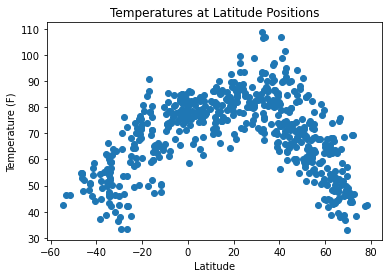

In [67]:
x_values = city_df['lat']
y_values = city_df['max temp']

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

plt.show()

## Latitude vs. Humidity Plot

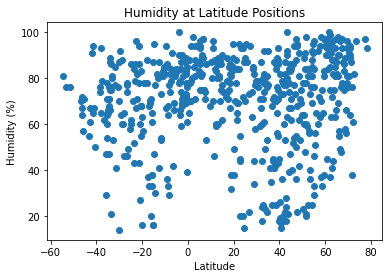

In [68]:
x_values = city_df['lat']
y_values = city_df['humidity']

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.show()

## Latitude vs. Cloudiness Plot

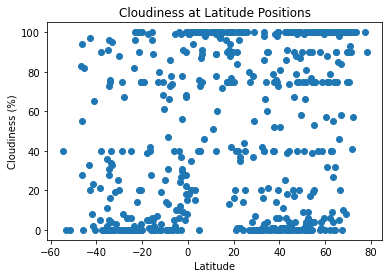

In [69]:
x_values = city_df['lat']
y_values = city_df['cloudiness']

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.show()

## Latitude vs. Wind Speed Plot

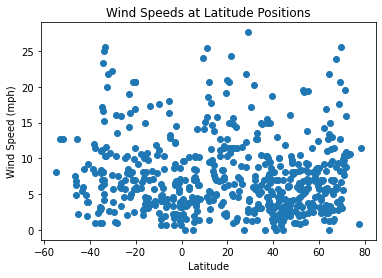

In [70]:
x_values = city_df["lat"]
y_values = city_df["wind speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.show()

## Linear Regression

In [81]:
# OPTIONAL: Create a function to create Linear Regression plots
# def linear_regression(x_values, y_values):
#     (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     correlation = st.pearsonr(x_values, y_values)
    
#     print(f"r-squared: {rvalue**2}")
#     print(f"Correlation: {correlation}")
#     print(f"Line: {line_eq}")

#     return regress_values, line_eq

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [82]:
# Create Northern and Southern Hemisphere DataFrames
mask = city_df['lat'] > 0
northern_hemisphere = city_df[mask]
southern_hemisphere = city_df[~mask]

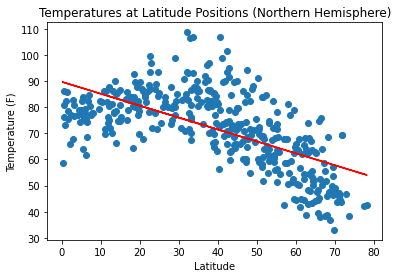

In [87]:
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['max temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = stats.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

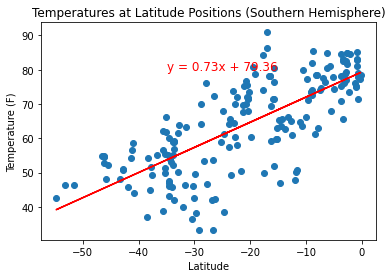

In [90]:
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['max temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = stats.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

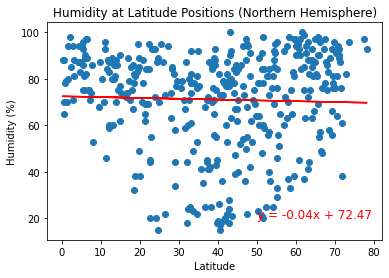

In [91]:
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = stats.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

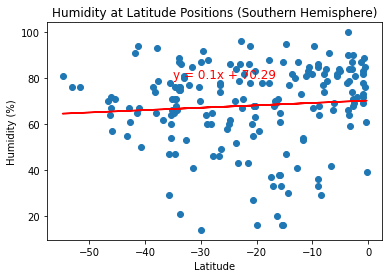

In [93]:
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = stats.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.show()



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

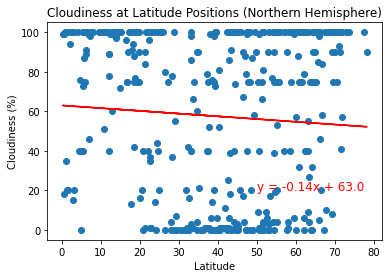

In [94]:
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = stats.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

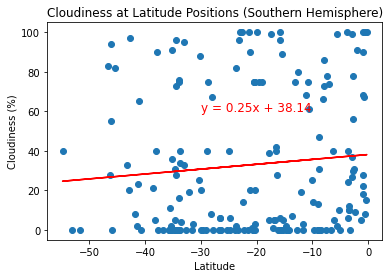

In [97]:
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = stats.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

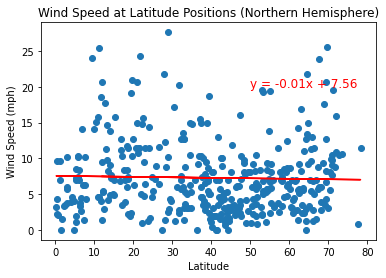

In [98]:
x_values = northern_hemisphere['lat']
y_values = northern_hemisphere['wind speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = stats.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

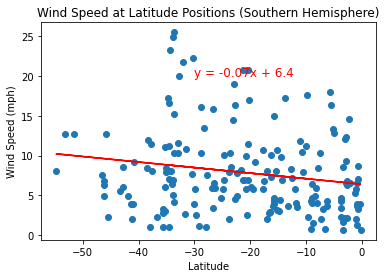

In [99]:
x_values = southern_hemisphere['lat']
y_values = southern_hemisphere['wind speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = stats.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.show()